<h1><span style="color:#4095a5"><strong>Bellabeat - Wellness Technology</strong></span></h1>

# **1. INTRODUCTION**
* This analysis is for case study #2 from the Google Data Analytics Certificate (Bellabeat).

* It’s originally based on the case study “FitBit Fitness Tracker Data” by Möbius [found here](https://www.kaggle.com/arashnic/fitbit)

* The purpose of this script is to clean and consolidate data to conduct an analysis that aims to get insights into how consumers are using their smart data. These insights will help guide the marketing strategy for the company.

### Questions to be answered:

* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?



### About Bellabeat
* Bellabeat is a high-tech company that manufactures health-focused smart products. Collecting data on activity, sleep, stress, and reproductive health has allowed Bellabeat to empower women with knowledge about their own health and habits. Since it was founded in 2013, Bellabeat has grown rapidly and quickly positioned itself as a tech-driven wellness company for women.

### Key Stakeholders
* Urška Sršen: Cofounder and Chief Creative Officer
* Sando Mur: Cofounder and Mathematician


### Business Task
* Analyze smart device usage data in order to gain insight into how consumers use non-Bellabeat smart devices.
* Select one Bellabeat product to apply these insights to.
* What are some trends in smart device usage?
* How could these trends apply to Bellabeat customers?
* How could these trends help influence Bellabeat marketing strategy?


### Data Source
* FitBit Fitness Tracker Data (CC0: Public Domain, dataset made available through Möbius) [Click here](https://www.kaggle.com/arashnic/fitbit)

# **2. Load the required libraries**

In [59]:
library(dplyr)
library(plyr)
library(readr)
library(ggplot2)
library(tidyr)
library(tidyverse)
library(lubridate)
library(anytime)
library(gridExtra)

# **3. Loading the dataset**

In [60]:
daily_activity <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
daily_sleep<- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")

hourly_calories <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
hourly_intensities <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyIntensities_merged.csv")
hourly_steps <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")

minute_calorie_narrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesNarrow_merged.csv")
minute_calorie_wide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteCaloriesWide_merged.csv")
minute_intensities_narrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesNarrow_merged.csv")
minute_intensities_wide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteIntensitiesWide_merged.csv")
minute_steps_narrow <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsNarrow_merged.csv")
minute_steps_wide <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteStepsWide_merged.csv")
minute_mets <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteMETsNarrow_merged.csv")
minute_sleep <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/minuteSleep_merged.csv")

heart_rate_sec <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
weight_log <- read_csv("../input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDate = col_character(),
  TotalSteps = col_double(),
  TotalDistance = col_double(),
  TrackerDistance = col_double(),
  LoggedActivitiesDistance = col_double(),
  VeryActiveDistance = col_double(),
  ModeratelyActiveDistance = col_double(),
  LightActiveDistance = col_double(),
  SedentaryActiveDistance = col_double(),
  VeryActiveMinutes = col_double(),
  FairlyActiveMinutes = col_double(),
  LightlyActiveMinutes = col_double(),
  SedentaryMinutes = col_double(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  Calories = col_double()
)



── Column specification ────────────────────────────────────────────────────────
cols(
  Id = col_double(),
  ActivityDay = col_character(),
  SedentaryMinutes = col_double(),
  LightlyActiveMinutes = col_dou

# **4. Data review and cleaning**

* We merge daily_activity and daily_sleep to create new dataset daily_data
* We merge hourly_calories, hourly_steps, hourly_intensities to create new dataset hourly_data
* Similarly we merge minute_calorie_narrow, minute_steps_narrow and minute_intensities_narrow to create new dataset  minute_data
* Other dataset minute_mets, heart_rate_sec, weight_log
* We wont be using the below datasets for our analysis :
* minute_sleep, minute_steps_wide, minute_intensities_wide, minute_calorie_wide
* daily_data consist of daily_steps, daily_intensities, daily_calories, so we wont be using this dataset.

In [61]:
head(daily_activity)

Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016,13162,8.50,8.50,0,1.88,0.55,6.06,0,25,13,328,728,1985
1503960366,4/13/2016,10735,6.97,6.97,0,1.57,0.69,4.71,0,21,19,217,776,1797
1503960366,4/14/2016,10460,6.74,6.74,0,2.44,0.40,3.91,0,30,11,181,1218,1776
1503960366,4/15/2016,9762,6.28,6.28,0,2.14,1.26,2.83,0,29,34,209,726,1745
1503960366,4/16/2016,12669,8.16,8.16,0,2.71,0.41,5.04,0,36,10,221,773,1863
1503960366,4/17/2016,9705,6.48,6.48,0,3.19,0.78,2.51,0,38,20,164,539,1728


In [62]:
daily_activity <- daily_activity %>% 
  mutate(TotalActiveMinutes = VeryActiveMinutes + FairlyActiveMinutes + LightlyActiveMinutes)

daily_activity$day_of_week <- format(as.Date(daily_activity$ActivityDate), "%A")
daily_activity$day_of_week <- ordered(daily_activity$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

skimr::skim(daily_activity)

── Data Summary ────────────────────────
                           Values        
Name                       daily_activity
Number of rows             940           
Number of columns          17            
_______________________                  
Column type frequency:                   
  character                1             
  factor                   1             
  numeric                  15            
________________________                 
Group variables            None          

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 ActivityDate          0             1     8     9     0       31          0

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 day_of_week         578         0.385 TRUE           7
  top_counts                        
1 Sun: 82, Mon: 62, Wed: 5

##### ActivityDate is stored as character, we will convert it to datetime format.

In [63]:
head(daily_sleep)

Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
<dbl>,<chr>,<dbl>,<dbl>,<dbl>
1503960366,4/12/2016 12:00:00 AM,1,327,346
1503960366,4/13/2016 12:00:00 AM,2,384,407
1503960366,4/15/2016 12:00:00 AM,1,412,442
1503960366,4/16/2016 12:00:00 AM,2,340,367
1503960366,4/17/2016 12:00:00 AM,1,700,712
1503960366,4/19/2016 12:00:00 AM,1,304,320


* SleepDay field is stored as character, we will convert it to datetime format.

* We will convert the dates from chr to POSIXct in both tables and merge both this daily data table.

In [64]:
daily_activity$ActivityDate <- as.POSIXct(daily_activity$ActivityDate, format = '%m/%d/%Y')

In [65]:
daily_sleep <- mutate(daily_sleep, SleepDay = format(as.Date(parse_date_time(daily_sleep$SleepDay, '%m/%d/%Y %I:%M:%S'), "%m/%d/%Y")))
daily_sleep$SleepDay <- as.POSIXct(daily_sleep$SleepDay, format = '%Y-%m-%d')

* Merging will be done on Id and date field.
* To merge them we rename SleepDay field in daily_sleep dataframe to ActivityDate.

In [66]:
daily_sleep <- rename(daily_sleep, replace = c("SleepDay" = "ActivityDate"))
daily_activity_sleep <- merge(daily_activity, daily_sleep, by = c("Id", "ActivityDate"))
summary(daily_activity_sleep)

       Id             ActivityDate                   TotalSteps   
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :   17  
 1st Qu.:3.977e+09   1st Qu.:2016-04-19 00:00:00   1st Qu.: 5206  
 Median :4.703e+09   Median :2016-04-27 00:00:00   Median : 8925  
 Mean   :5.001e+09   Mean   :2016-04-26 12:40:05   Mean   : 8541  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-04 00:00:00   3rd Qu.:11393  
 Max.   :8.792e+09   Max.   :2016-05-12 00:00:00   Max.   :22770  
                                                                  
 TotalDistance    TrackerDistance  LoggedActivitiesDistance VeryActiveDistance
 Min.   : 0.010   Min.   : 0.010   Min.   :0.0000           Min.   : 0.00     
 1st Qu.: 3.600   1st Qu.: 3.600   1st Qu.:0.0000           1st Qu.: 0.00     
 Median : 6.290   Median : 6.290   Median :0.0000           Median : 0.57     
 Mean   : 6.039   Mean   : 6.034   Mean   :0.1131           Mean   : 1.45     
 3rd Qu.: 8.030   3rd Qu.: 8.020   3rd Qu.:0.0000           3rd Qu.: 

* Above summary gives a lot of information, it gives mean time of the activities and activity minutes along with sleep records.

In [67]:
head(minute_mets)

Id,ActivityMinute,METs
<dbl>,<chr>,<dbl>
1503960366,4/12/2016 12:00:00 AM,10
1503960366,4/12/2016 12:01:00 AM,10
1503960366,4/12/2016 12:02:00 AM,10
1503960366,4/12/2016 12:03:00 AM,10
1503960366,4/12/2016 12:04:00 AM,10
1503960366,4/12/2016 12:05:00 AM,12


* ActivityMinute field is stored as character, we will convert it to datetime format.

In [68]:
minute_mets$ActivityMinute <- as.POSIXct(minute_mets$ActivityMinute, format = '%m/%d/%Y %I:%M:%S %p')
summary(minute_mets)

       Id            ActivityMinute                     METs       
 Min.   :1.504e+09   Min.   :2016-04-12 00:00:00   Min.   :  0.00  
 1st Qu.:2.320e+09   1st Qu.:2016-04-19 01:51:00   1st Qu.: 10.00  
 Median :4.445e+09   Median :2016-04-26 06:27:00   Median : 10.00  
 Mean   :4.848e+09   Mean   :2016-04-26 12:09:55   Mean   : 14.69  
 3rd Qu.:6.962e+09   3rd Qu.:2016-05-03 18:55:00   3rd Qu.: 11.00  
 Max.   :8.878e+09   Max.   :2016-05-12 15:59:00   Max.   :157.00  

In [69]:
head(heart_rate_sec)

Id,Time,Value
<dbl>,<chr>,<dbl>
2022484408,4/12/2016 7:21:00 AM,97
2022484408,4/12/2016 7:21:05 AM,102
2022484408,4/12/2016 7:21:10 AM,105
2022484408,4/12/2016 7:21:20 AM,103
2022484408,4/12/2016 7:21:25 AM,101
2022484408,4/12/2016 7:22:05 AM,95


* Time field is stored as character, we will convert it to datetime format.

In [70]:
heart_rate_sec$Time <- as.POSIXct(heart_rate_sec$Time, format = '%m/%d/%Y %I:%M:%S %p')
skimr::skim(heart_rate_sec)

── Data Summary ────────────────────────
                           Values        
Name                       heart_rate_sec
Number of rows             2483658       
Number of columns          3             
_______________________                  
Column type frequency:                   
  numeric                  2             
  POSIXct                  1             
________________________                 
Group variables            None          

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean           sd         p0
1 Id                    0             1 5513764629.  1950223761.  2022484408
2 Value                 0             1         77.3         19.4         36
         p25        p50        p75       p100 hist 
1 4388161847 5553957443 6962181067 8877689391 ▃▇▇▅▃
2         63         73         88        203 ▇▇▁▁▁

── Variable type: POSIXct ───────────────────────────────────────────

In [71]:
head(weight_log)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,5/2/2016 11:59:59 PM,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,5/3/2016 11:59:59 PM,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,4/13/2016 1:08:52 AM,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,4/21/2016 11:59:59 PM,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,5/12/2016 11:59:59 PM,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,4/17/2016 11:59:59 PM,72.4,159.6147,25,27.45,TRUE,1.460938e+12


* Date field is stored as character, we will convert it to datetime format.

In [72]:
weight_log$Date <- as.POSIXct(weight_log$Date, format = '%m/%d/%Y %I:%M:%S %p')
skimr::skim(weight_log)

── Data Summary ────────────────────────
                           Values    
Name                       weight_log
Number of rows             67        
Number of columns          8         
_______________________              
Column type frequency:               
  logical                  1         
  numeric                  6         
  POSIXct                  1         
________________________             
Group variables            None      

── Variable type: logical ──────────────────────────────────────────────────────
  skim_variable  n_missing complete_rate  mean count           
1 IsManualReport         0             1 0.612 TRU: 41, FAL: 26

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean            sd      p0     p25
1 Id                    0        1      7.01e 9 1950321944.   1.50e 9 6.96e 9
2 WeightKg              0        1      7.20e 1         13.9  5.26e 1 6.14e 1
3 WeightPounds 

* We will merge hourly_calories, hourly_steps and hourly_intensities, and convert ActivityHour column to datetime format.

In [73]:
hourly_data <- merge(hourly_calories, hourly_steps, by = c("Id", "ActivityHour"))
hourly_data <- merge(hourly_data, hourly_intensities, by = c("Id", "ActivityHour"))
hourly_data$ActivityHour <- as.POSIXct(hourly_data$ActivityHour, format = '%m/%d/%Y %I:%M:%S %p')

hourly_data$day_of_week <- format(as.Date(hourly_data$ActivityHour), "%A")
hourly_data$day_of_week <- ordered(hourly_data$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

skimr::skim(hourly_data)

── Data Summary ────────────────────────
                           Values     
Name                       hourly_data
Number of rows             22099      
Number of columns          7          
_______________________               
Column type frequency:                
  factor                   1          
  numeric                  5          
  POSIXct                  1          
________________________              
Group variables            None       

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 day_of_week           0             1 TRUE           7
  top_counts                                
1 Tue: 3600, Wed: 3547, Thu: 3283, Fri: 2997

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable    n_missing complete_rate    mean      sd         p0        p25
1 Id                       0             1 4.85e+9 2.42e+9 1503960366 2320127002


In [74]:
hourly_data$hour <-  format(hourly_data$ActivityHour, format = "%H")
head(hourly_data)

,Id,ActivityHour,Calories,StepTotal,TotalIntensity,AverageIntensity,day_of_week,hour
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<chr>
1,1503960366,2016-04-12 01:00:00,61,160,8,0.133333,Tuesday,01
2,1503960366,2016-04-12 13:00:00,66,221,6,0.100000,Tuesday,13
3,1503960366,2016-04-12 10:00:00,99,676,29,0.483333,Tuesday,10
4,1503960366,2016-04-12 22:00:00,65,89,9,0.150000,Tuesday,22
5,1503960366,2016-04-12 11:00:00,76,360,12,0.200000,Tuesday,11
6,1503960366,2016-04-12 23:00:00,81,338,21,0.350000,Tuesday,23


* We will merge minute_calorie_narrow, minute_steps_narrow and minute_intensities_narrow, and convert ActivityHour column to datetime format.

In [75]:
minute_data <- merge(minute_calorie_narrow, minute_steps_narrow, by = c("Id", "ActivityMinute"))
minute_data <- merge(minute_data, minute_intensities_narrow, by = c("Id", "ActivityMinute"))
minute_data$ActivityMinute <- as.POSIXct(minute_data$ActivityMinute, format = '%m/%d/%Y %I:%M:%S %p')
skimr::skim(minute_data)

── Data Summary ────────────────────────
                           Values     
Name                       minute_data
Number of rows             1325580    
Number of columns          5          
_______________________               
Column type frequency:                
  numeric                  4          
  POSIXct                  1          
________________________              
Group variables            None       

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate    mean      sd         p0     p25
1 Id                    0             1 4.85e+9 2.42e+9 1503960366 2.32e+9
2 Calories              0             1 1.62e+0 1.41e+0          0 9.36e-1
3 Steps                 0             1 5.34e+0 1.81e+1          0 0      
4 Intensity             0             1 2.01e-1 5.19e-1          0 0      
            p50           p75         p100 hist 
1 4445114986    6962181067    8877689391   ▇▅▃▅▅
2          1.2

In [76]:
daily_activity_sleep$day <- as.POSIXct(daily_activity_sleep$ActivityDate, format = '%d')


daily_activity_sleep$day   <- format(as.Date(daily_activity_sleep$ActivityDate), "%d")

daily_activity_sleep$day_of_week <- format(as.Date(daily_activity_sleep$ActivityDate), "%A")
daily_activity_sleep$day_of_week <- ordered(daily_activity_sleep$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

daily_activity_sleep$hour <-  format(daily_activity_sleep$ActivityDate, format = "%H")

In [77]:
head(daily_activity_sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,day_of_week,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day,hour
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,328,728,1985,366,Tuesday,1,327,346,12,00
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,217,776,1797,257,Wednesday,2,384,407,13,00
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,209,726,1745,272,Friday,1,412,442,15,00
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,221,773,1863,267,Saturday,2,340,367,16,00
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,164,539,1728,222,Sunday,1,700,712,17,00
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,264,775,2035,345,Tuesday,1,304,320,19,00


# **5. Data Visualisation**

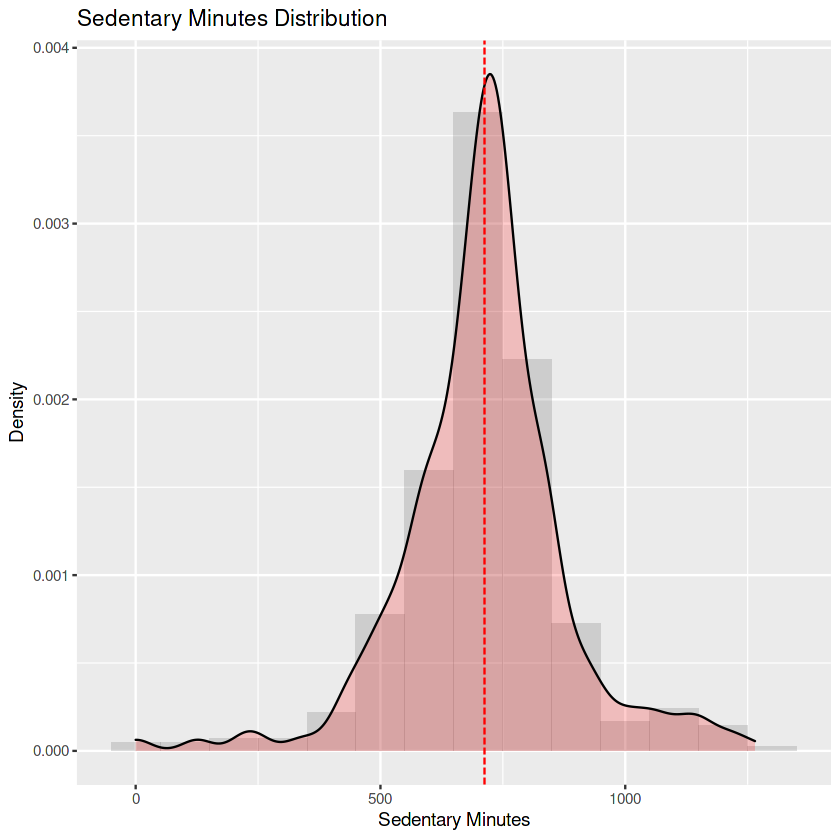

In [78]:
ggplot(daily_activity_sleep, aes(x=SedentaryMinutes)) + 
  geom_histogram(aes(y=..density..), binwidth=100,alpha=0.2)+
  geom_density(alpha=0.2, fill="red") +
  geom_vline(aes(xintercept=mean(SedentaryMinutes, na.rm=T)), color="red", linetype="longdash")+
  labs(title="Sedentary Minutes Distribution", x= "Sedentary Minutes", y="Density")

In [79]:
temp <- daily_activity_sleep %>%
  group_by(day_of_week ) %>%
  dplyr::summarise(steps = sum(TotalSteps)) %>%
  mutate(pct = steps/sum(steps), lbl = scales::percent(pct))

temp

day_of_week,steps,pct,lbl
<ord>,<dbl>,<dbl>,<chr>
Sunday,401382,0.1137868,11.38%
Monday,438973,0.1244434,12.44%
Tuesday,596875,0.1692067,16.92%
Wednesday,529509,0.1501092,15.01%
Thursday,533348,0.1511976,15.12%
Friday,450380,0.1276772,12.77%
Saturday,577024,0.1635792,16.36%


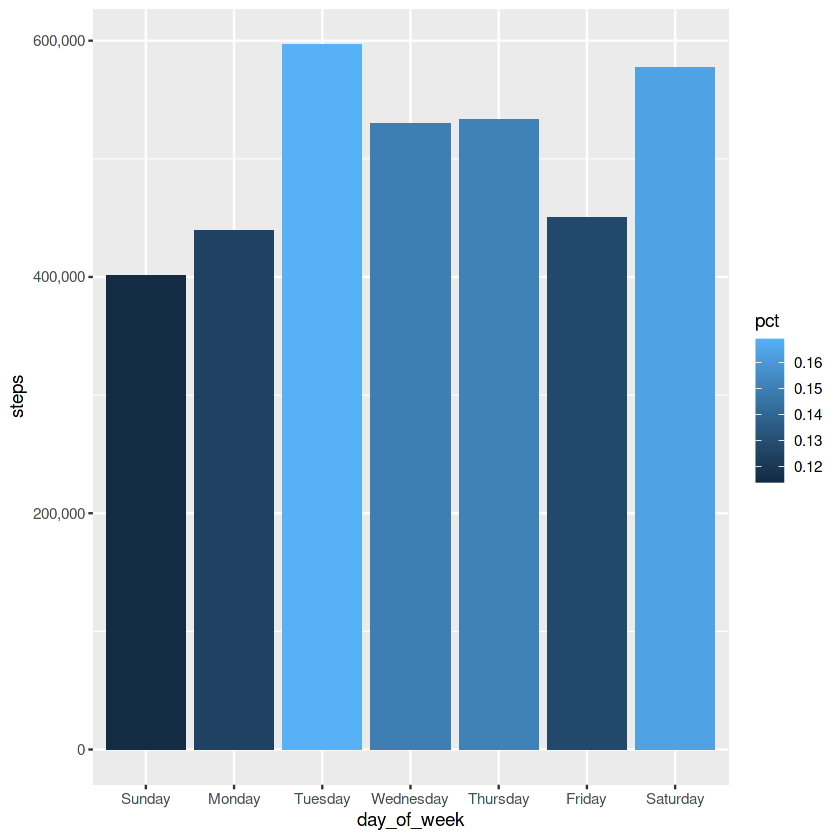

In [80]:
ggplot(temp) +
  geom_col(mapping=aes(x=day_of_week, y=steps, fill=pct)) +
  scale_y_continuous(labels = scales::comma)

* It seems more steps are walked on Tuesday's and Friday's

In [81]:
temp_calories1 <- daily_activity_sleep %>%
  group_by(day_of_week) %>%
  dplyr::summarise(steps = sum(TotalSteps), calories = sum(Calories))

temp_calories1

day_of_week,steps,calories
<ord>,<dbl>,<dbl>
Sunday,401382,125213
Monday,438973,115876
Tuesday,596875,162253
Wednesday,529509,156964
Thursday,533348,150526
Friday,450380,132790
Saturday,577024,146576


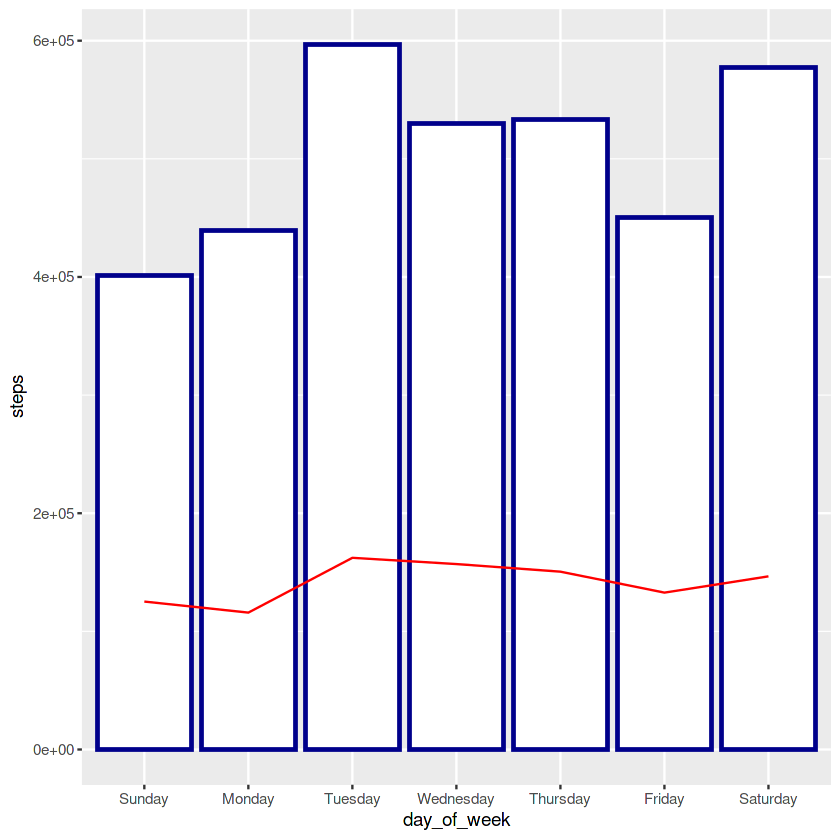

In [82]:
ggplot(temp_calories1) + 
  geom_col(aes(x = day_of_week, y = steps), size = 1, color = "darkblue", fill = "white") +
  geom_line(aes(x = day_of_week, y = calories), size = 0.5, color="red", group = 1)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



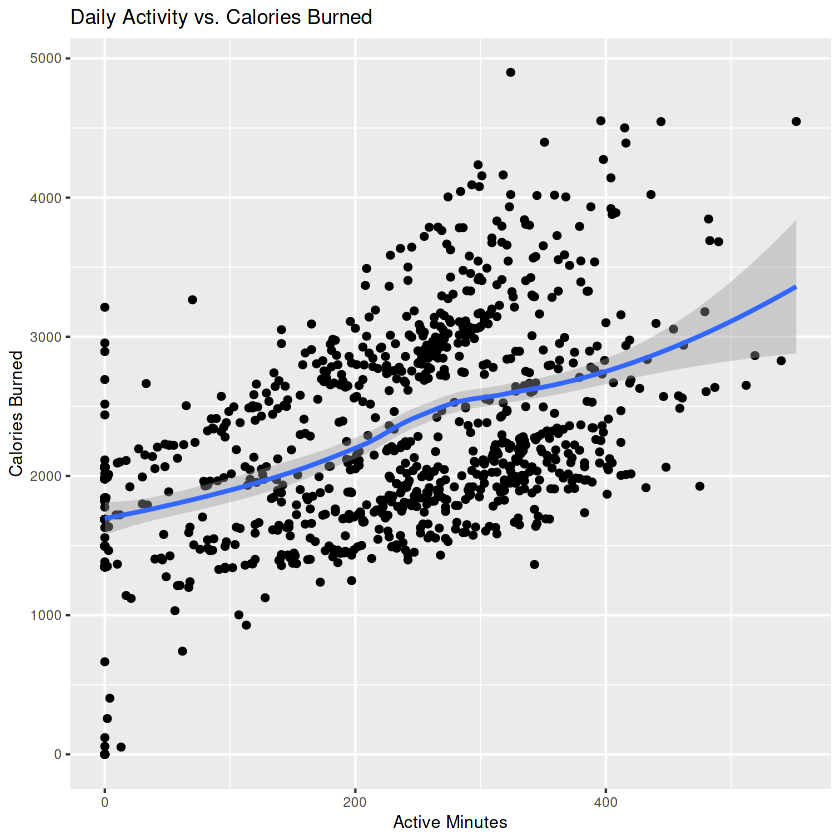

In [83]:
ggplot(daily_activity, aes(x = TotalActiveMinutes, y = Calories))+
  geom_point()+
  geom_smooth()+
  labs(title="Daily Activity vs. Calories Burned", x= "Active Minutes", y="Calories Burned")+
  theme(plot.title = element_text(size=12), text = element_text(size=10))

* Positive relationship between daily activity and calories burned.

In [84]:
temp_distance_1 <- daily_activity_sleep %>%
  group_by(day_of_week) %>%
  dplyr::summarise(total_distance = sum(TotalDistance), tracker_distance = sum(TrackerDistance), logged_activity_distance = sum(LoggedActivitiesDistance))

temp_distance_1

day_of_week,total_distance,tracker_distance,logged_activity_distance
<ord>,<dbl>,<dbl>,<dbl>
Sunday,285.16,285.16,0.000000
Monday,310.72,310.49,16.413733
Tuesday,417.95,417.95,9.012324
Wednesday,377.51,377.51,6.276441
Thursday,376.88,375.05,10.840935
Friday,314.18,314.18,4.184294
Saturday,411.55,411.55,0.000000


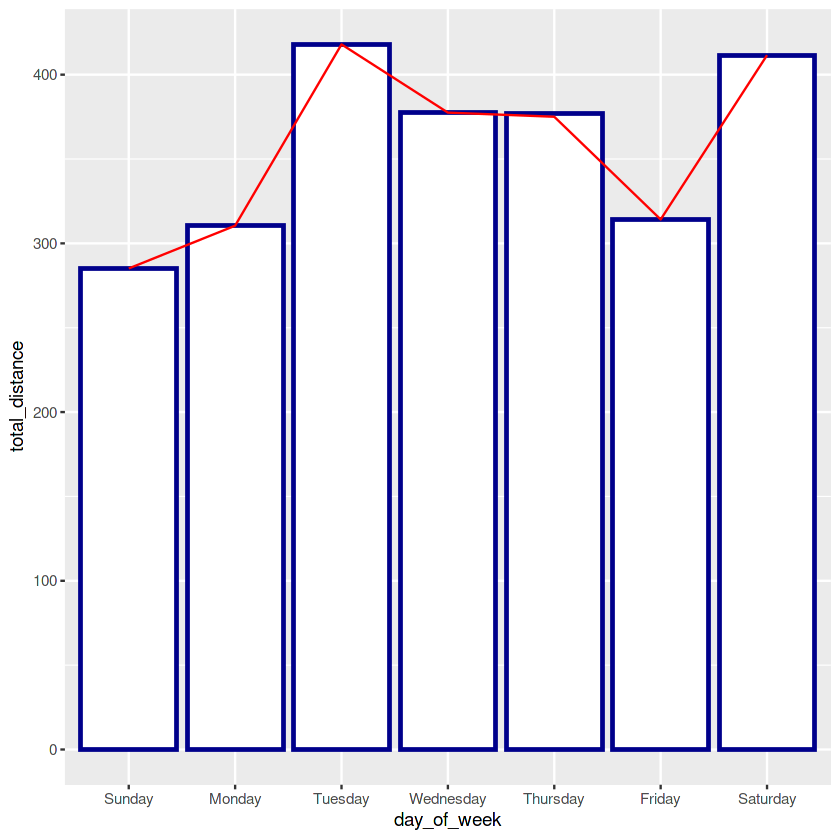

In [85]:
ggplot(temp_distance_1) + 
  geom_col(aes(x = day_of_week, y = total_distance), size = 1, color = "darkblue", fill = "white") +
  geom_line(aes(x = day_of_week, y = tracker_distance), size = 0.5, color="red", group = 1)

In [86]:
temp_distance_2 <- daily_activity_sleep %>%
  group_by(day_of_week) %>%
  dplyr::summarise(very_active_dist = sum(VeryActiveDistance), moderately_active_dist = sum(ModeratelyActiveDistance), light_active_dist = sum(LightActiveDistance),sedentary_active_dist = sum(SedentaryActiveDistance))

temp_distance_2

day_of_week,very_active_dist,moderately_active_dist,light_active_dist,sedentary_active_dist
<ord>,<dbl>,<dbl>,<dbl>,<dbl>
Sunday,65.46,38.64,180.91,0.00
Monday,84.83,36.95,188.56,0.10
Tuesday,111.70,53.08,252.63,0.09
Wednesday,89.62,46.47,241.04,0.00
Thursday,80.69,43.98,241.63,0.18
Friday,64.64,33.52,215.43,0.01
Saturday,102.06,57.21,252.14,0.00


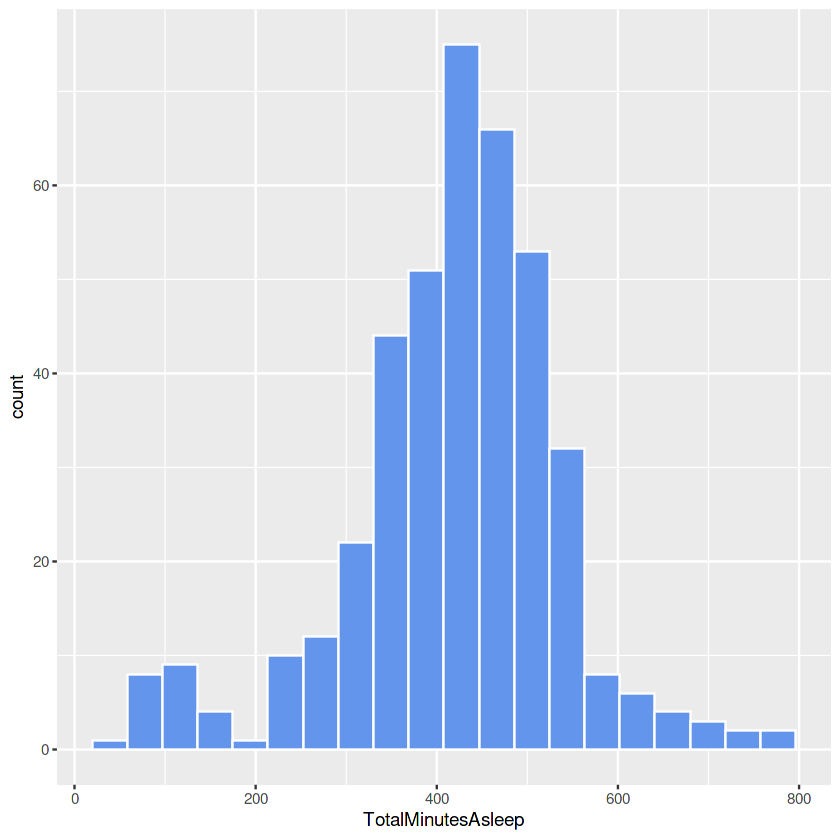

In [87]:
daily_activity_sleep %>%
  ggplot(aes(x = TotalMinutesAsleep)) +
  geom_histogram(fill = "cornflowerblue", 
                 color = "white", 
                 bins = 20)

* Sleep minutes seems to be be spread well with majority around 400 to 500 mins.

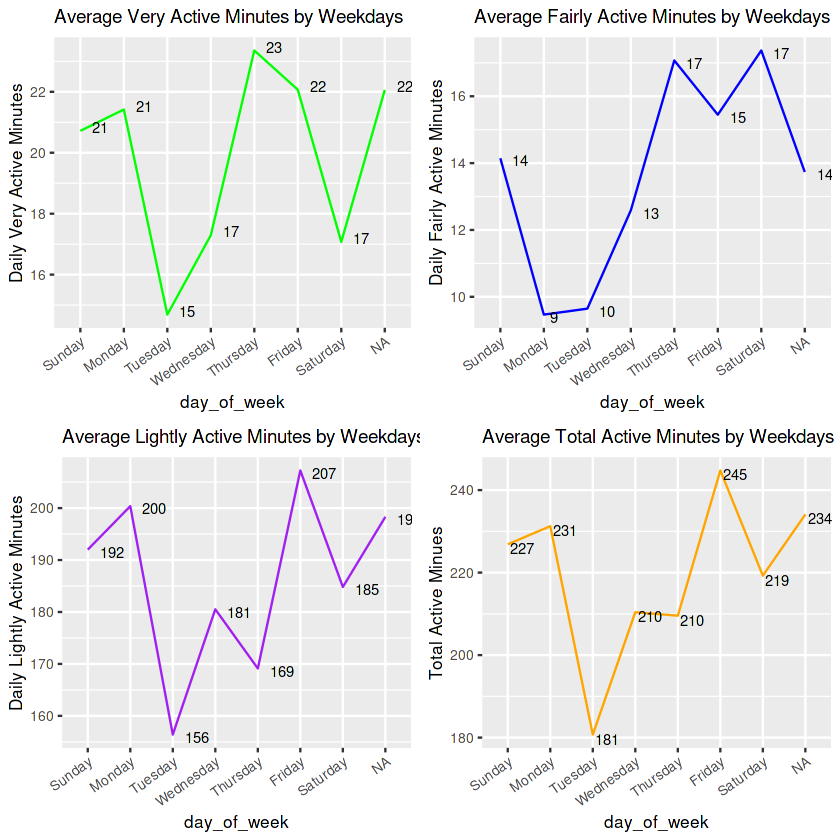

In [88]:
average_very_active_minutes <- daily_activity %>% 
  group_by(day_of_week) %>% 
  summarise_at(vars(VeryActiveMinutes),
               list(VeryActiveMinutes = mean))

average_fairly_active_minutes <- daily_activity %>% 
  group_by(day_of_week) %>% 
  summarise_at(vars(FairlyActiveMinutes),
               list(FairlyActiveMinutes = mean))

average_lightly_active_minutes <- daily_activity %>% 
  group_by(day_of_week) %>% 
  summarise_at(vars(LightlyActiveMinutes),
               list(LightlyActiveMinutes = mean))

average_total_active_minutes <- daily_activity %>% 
  group_by(day_of_week) %>% 
  summarise_at(vars(TotalActiveMinutes),
               list(TotalActiveMinutes = mean))

average_activity_minutes <- merge(average_very_active_minutes,average_fairly_active_minutes,by=c("day_of_week"))

average_activity_minutes1 <- merge(average_activity_minutes,average_lightly_active_minutes, by=c("day_of_week"))


very_active_chart <- ggplot(average_activity_minutes1, aes(x=day_of_week,y=VeryActiveMinutes, group=1))+
  geom_line(color = "green1")+
  labs(title="Average Very Active Minutes by Weekdays", x= "day_of_week", y="Daily Very Active Minutes")+
  geom_text(aes(label=round(VeryActiveMinutes, digits=0), hjust=-0.75, vjust=0.2),size=3)+
  theme(plot.title = element_text(size=11), text = element_text(size=10), axis.text.x = element_text(angle=35, hjust=1))

fairly_active_chart <- ggplot(average_activity_minutes1, aes(x=day_of_week, y=FairlyActiveMinutes, group=1))+
  geom_line(color = "blue")+
  labs(title="Average Fairly Active Minutes by Weekdays", x= "day_of_week", y="Daily Fairly Active Minutes")+
  geom_text(aes(label=round(FairlyActiveMinutes, digits=0), hjust=-.75, vjust=0.75),size=3.0)+
  theme(plot.title = element_text(size=11), text = element_text(size=10), axis.text.x = element_text(angle=35, hjust=1))


lightly_active_chart <- ggplot(average_activity_minutes1, aes(x=day_of_week, y=LightlyActiveMinutes, group=1))+
  geom_line(color = "purple")+
  labs(title="Average Lightly Active Minutes by Weekdays", x= "day_of_week", y="Daily Lightly Active Minutes")+
  geom_text(aes(label=round(LightlyActiveMinutes, digits=0), hjust=-0.5, vjust=0.75),size=3)+
  theme(plot.title = element_text(size=11), text = element_text(size=10), axis.text.x = element_text(angle=35, hjust=1))

average_daily_total <- ggplot(average_total_active_minutes, aes(x=day_of_week, y=TotalActiveMinutes, group=1))+
  geom_line(color = "orange1")+
  labs(title="Average Total Active Minutes by Weekdays", x= "day_of_week", y="Total Active Minues")+
  geom_text(aes(label=round(TotalActiveMinutes, digits=0), hjust=-0.1, vjust=0.9),size=3)+
  theme(plot.title = element_text(size=11), text = element_text(size=10), axis.text.x = element_text(angle=35, hjust=1))

grid.arrange(very_active_chart,fairly_active_chart,lightly_active_chart,average_daily_total, nrow=2)

In [89]:
head(daily_activity_sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,day_of_week,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day,hour
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,328,728,1985,366,Tuesday,1,327,346,12,00
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,217,776,1797,257,Wednesday,2,384,407,13,00
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,209,726,1745,272,Friday,1,412,442,15,00
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,221,773,1863,267,Saturday,2,340,367,16,00
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,164,539,1728,222,Sunday,1,700,712,17,00
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,264,775,2035,345,Tuesday,1,304,320,19,00


In [90]:
daily_activity_sleep %>%
  group_by(day_of_week) %>%
  dplyr::summarise(totalminutesasleep = sum(TotalMinutesAsleep), totaltimeinbed = sum(TotalTimeInBed)) %>%
  mutate(sleep_pct = totalminutesasleep/sum(totalminutesasleep), bed_pct = totaltimeinbed/sum(totaltimeinbed), sleep_lbl = scales::percent(sleep_pct), bed_lbl = scales::percent(bed_pct)) 

day_of_week,totalminutesasleep,totaltimeinbed,sleep_pct,bed_pct,sleep_lbl,bed_lbl
<ord>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
Sunday,24901,27693,0.1437370,0.1462005,14.374%,14.62%
Monday,19685,21440,0.1136285,0.1131888,11.363%,11.32%
Tuesday,26295,28814,0.1517837,0.1521186,15.178%,15.21%
Wednesday,28689,31022,0.1656026,0.1637754,16.560%,16.38%
Thursday,26154,28327,0.1509698,0.1495476,15.097%,14.95%
Friday,23109,25368,0.1333930,0.1339260,13.339%,13.39%
Saturday,24407,26754,0.1408855,0.1412432,14.089%,14.12%


In [91]:
length(unique(daily_activity$Id))
length(unique(daily_sleep$Id))
length(unique(daily_activity_sleep$Id))
length(unique(hourly_data$Id))
length(unique(minute_mets$Id))
length(unique(heart_rate_sec$Id))
length(unique(weight_log$Id))

[1] 33

[1] 24

[1] 24

[1] 33

[1] 33

[1] 14

[1] 8

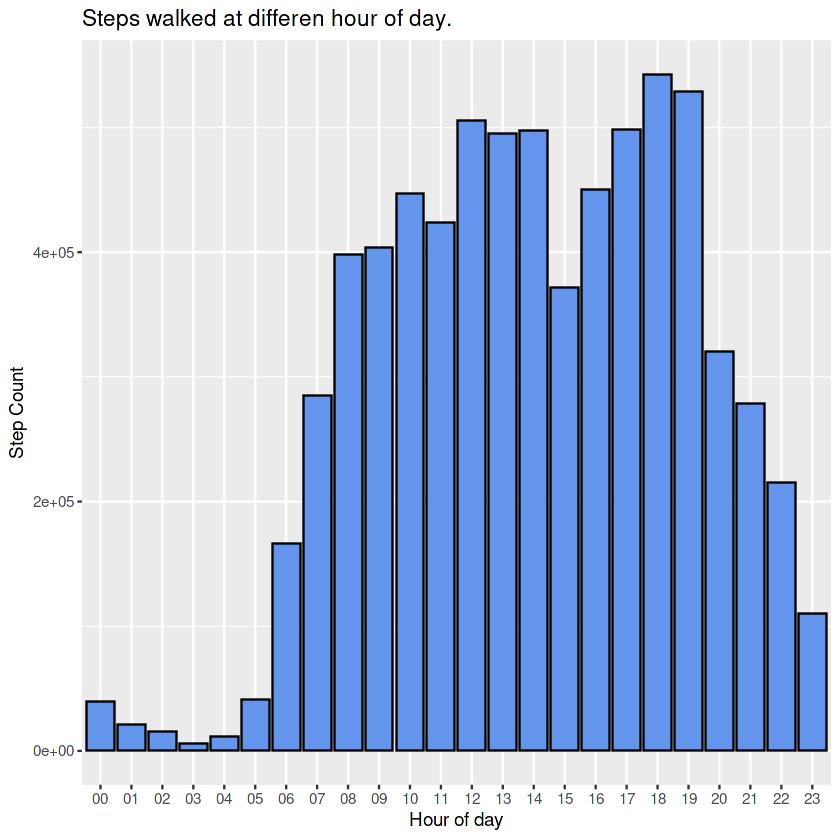

In [92]:
data <- hourly_data %>%
  group_by(hour) %>%
  dplyr::summarise(step_total = sum(StepTotal))
  
 ggplot(data,
       aes(x=hour,
           y = step_total)) +
  geom_bar(stat="identity",
           fill = "cornflowerblue",
           color = "black") +
  labs(x = "Hour of day", y = "Step Count", title  = "Steps walked at differen hour of day.")

hour,intensity_total,calorie_total
<chr>,<dbl>,<dbl>
00,1989,6706.6
01,1324,6546.4
02,974,6455.1
03,414,6301.3
04,590,6362.0
05,4614,7615.2
06,7235,8099.4
07,9993,8795.9
08,13656,9620.7


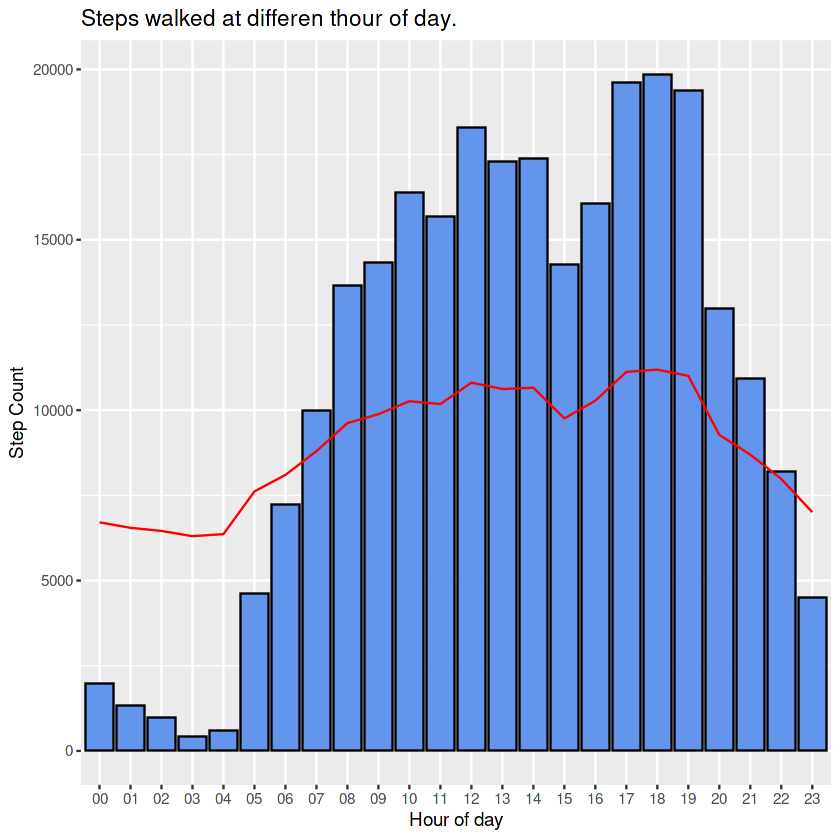

In [93]:
data <- hourly_data %>%
  group_by(hour) %>%
  dplyr::summarise(intensity_total = sum(TotalIntensity), calorie_total = sum(Calories)/10)
  
 ggplot(data,
       aes(x=hour,
           y = intensity_total)) +
  geom_bar(stat="identity",
           fill = "cornflowerblue",
           color = "black") +
  geom_line(aes(x = hour, y = calorie_total), size = 0.5, color="red", group = 1) +
  labs(x = "Hour of day", y = "Step Count", title  = "Steps walked at differen thour of day.")
 
 data

In [94]:
head(heart_rate_sec)

Id,Time,Value
<dbl>,<dttm>,<dbl>
2022484408,2016-04-12 07:21:00,97
2022484408,2016-04-12 07:21:05,102
2022484408,2016-04-12 07:21:10,105
2022484408,2016-04-12 07:21:20,103
2022484408,2016-04-12 07:21:25,101
2022484408,2016-04-12 07:22:05,95


In [95]:
heart_rate_date <- heart_rate_sec %>%
  group_by(Id) %>%
dplyr::summarise(count = table(Id), min = min(Value), mean = mean(Value), max = max(Value), )

heart_rate_date

Id,count,min,mean,max
<dbl>,<table>,<dbl>,<dbl>,<dbl>
2022484408,154104,38,80.23686,203
2026352035,2490,63,93.77631,125
2347167796,152683,49,76.72279,195
4020332650,285461,46,82.30058,191
4388161847,249748,39,66.13300,180
4558609924,192168,44,81.67395,199
5553957443,255174,47,68.63309,165
5577150313,248560,36,69.56452,174
6117666160,158899,52,83.74989,189


In [96]:
skimr::skim(heart_rate_date)

Warning message:
“Couldn't find skimmers for class: table; No user-defined `sfl` provided. Falling back to `character`.”


── Data Summary ────────────────────────
                           Values         
Name                       heart_rate_date
Number of rows             14             
Number of columns          5              
_______________________                   
Column type frequency:                    
  character                1              
  numeric                  4              
________________________                  
Group variables            None           

── Variable type: character ────────────────────────────────────────────────────
  skim_variable n_missing complete_rate   min   max empty n_unique whitespace
1 count                 0             1     4     6     0       14          0

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate         mean            sd           p0
1 Id                    0             1 5359099702.  2266973872.   2022484408  
2 min                   0             1         4

<ScaleContinuousPosition>
 Range:  
 Limits:    0 --    1

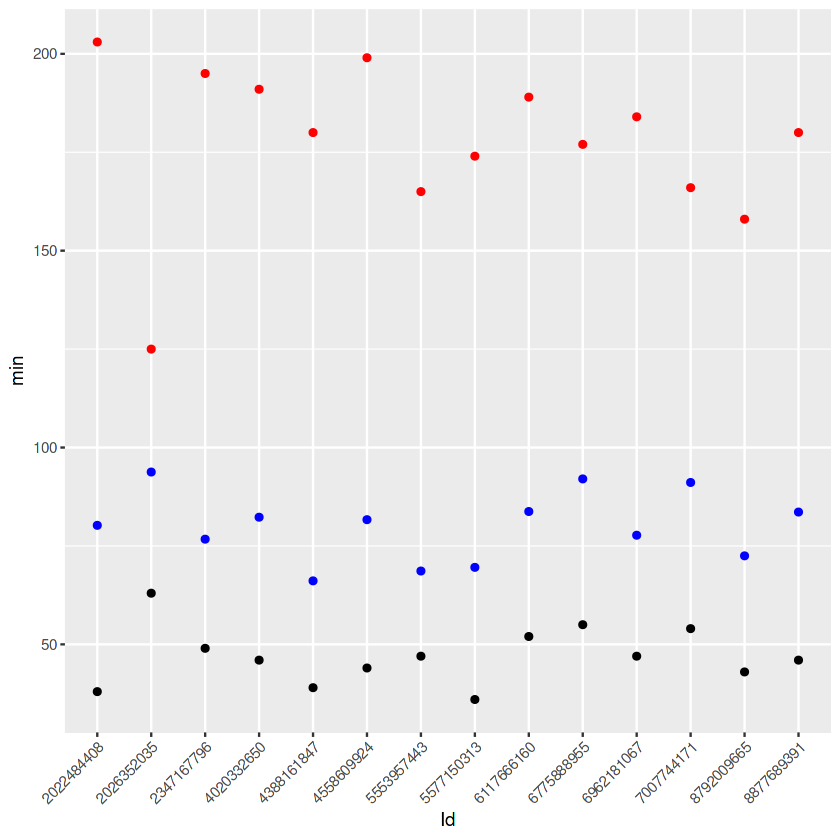

In [97]:
heart_rate_date$Id <- as.character(heart_rate_date$Id)


ggplot(heart_rate_date) +
  geom_point(aes(x=Id, y=min)) +
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1)) +
  geom_point(aes(x=Id, y=max), color = "red") +
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1)) +
  geom_point(aes(x=Id, y=mean), color = "blue") +
  theme(axis.text.x = element_text(angle = 45, 
                                   hjust = 1))
   scale_y_continuous(labels = scales::comma)

In [98]:
head(daily_activity_sleep)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,⋯,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalActiveMinutes,day_of_week,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,day,hour
,<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<ord>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
1,1503960366,2016-04-12,13162,8.50,8.50,0,1.88,0.55,6.06,0,⋯,328,728,1985,366,Tuesday,1,327,346,12,00
2,1503960366,2016-04-13,10735,6.97,6.97,0,1.57,0.69,4.71,0,⋯,217,776,1797,257,Wednesday,2,384,407,13,00
3,1503960366,2016-04-15,9762,6.28,6.28,0,2.14,1.26,2.83,0,⋯,209,726,1745,272,Friday,1,412,442,15,00
4,1503960366,2016-04-16,12669,8.16,8.16,0,2.71,0.41,5.04,0,⋯,221,773,1863,267,Saturday,2,340,367,16,00
5,1503960366,2016-04-17,9705,6.48,6.48,0,3.19,0.78,2.51,0,⋯,164,539,1728,222,Sunday,1,700,712,17,00
6,1503960366,2016-04-19,15506,9.88,9.88,0,3.53,1.32,5.03,0,⋯,264,775,2035,345,Tuesday,1,304,320,19,00


In [99]:
temp <- count(daily_activity_sleep$Id)
#temp$freq <- as.character(temp$freq)

temp <- temp[ order(temp$freq) , ]

temp$freq <- as.character(temp$freq)

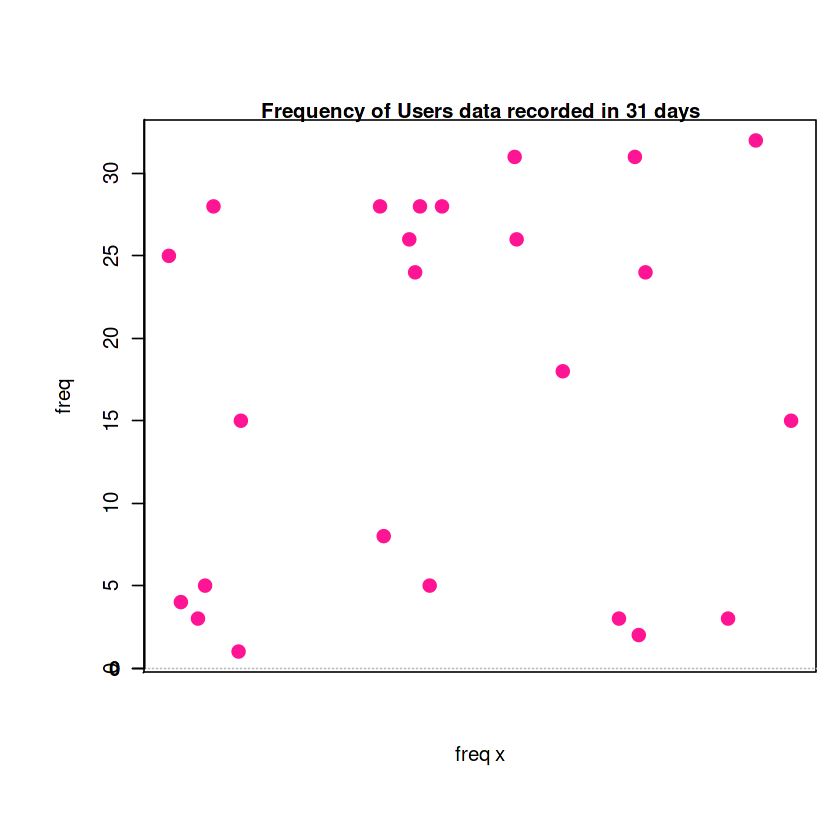

In [100]:
par(mar=c(7,6,5,1))
temp %>% plot(freq~x,xaxt="none", col="deeppink",cex=1.5,pch=16)
axis(1, seq(0,30,1))
mtext(side=3, "Frequency of Users data recorded in 31 days",font=2)
abline(h=seq(0,700,100), v=seq(0,30, 1), lty=3, col="gray")
axis(1, seq(0,30, 1),las=2, font=2,cex.axis=0.8)
axis(2, seq(0,700,100),las=2, font=2)

* Above graph denotes that more than 12 people have recorded their data or used the device more than 20 days out of 31.
* 3 people between 11 to 20 days
* And 9 people below 10 days.

* Daily usage at first glance:

* Within an 31 days of data recorded I wouldn't expect to see a clear daily trend in a Caldendar plot, however, we can still see few interesting points here:
* Of a total of 24 Ids (100%), the number of users who used their devices daily can vary from as little as 33% (8 users) to as many as 71% (17 users) each day. The  greatest number of users per day is around double that of the least number of user per day.
* Participants used their devices more frequently in the first half of the period than days towards the end.

In [101]:
obs_users <- daily_activity_sleep %>% group_by(ActivityDate) %>% 
  dplyr::summarise(user_perday = sum(n())) %>%  arrange(user_perday)

obs_users$user_perday <- as.character(obs_users$user_perday)

head(obs_users)

ActivityDate,user_perday
<dttm>,<chr>
2016-05-12,8
2016-04-18,10
2016-05-09,11
2016-05-11,11
2016-04-17,12
2016-05-03,12


In [102]:
count(obs_users$user_perday)

x,freq
<chr>,<int>
10,1
11,2
12,5
13,7
14,7
15,5
16,2
17,1
8,1


Warning message:
“Ignoring unknown parameters: binwidth, bins, pad”


geom_bar: na.rm = FALSE, orientation = NA
stat_bin: binwidth = NULL, bins = NULL, na.rm = FALSE, orientation = NA, pad = FALSE
position_stack 

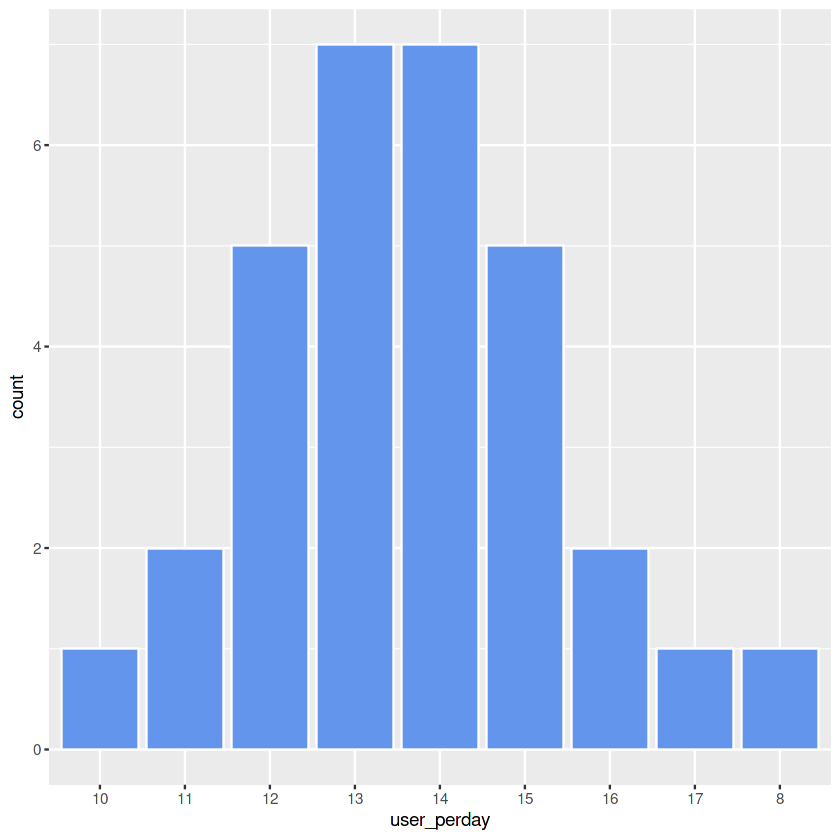

In [103]:
ggplot(obs_users, aes(x = user_perday)) +
  geom_histogram(fill = "cornflowerblue", 
                 color = "white", 
                 bins = 4, stat="count", position="identity")

geom_histogram()

* Out of 31 days data, minimum 8 users shared data on a given day.
* Max 14 users shared data together together on 10 days out of 31 days

In [104]:
head(weight_log)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12
1503960366,2016-05-03 23:59:59,52.6,115.9631,NA,22.65,TRUE,1.462320e+12
1927972279,2016-04-13 01:08:52,133.5,294.3171,NA,47.54,FALSE,1.460510e+12
2873212765,2016-04-21 23:59:59,56.7,125.0021,NA,21.45,TRUE,1.461283e+12
2873212765,2016-05-12 23:59:59,57.3,126.3249,NA,21.69,TRUE,1.463098e+12
4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,TRUE,1.460938e+12


In [105]:
na.omit(weight_log)

Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
<dbl>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1503960366,2016-05-02 23:59:59,52.6,115.9631,22,22.65,TRUE,1.462234e+12
4319703577,2016-04-17 23:59:59,72.4,159.6147,25,27.45,TRUE,1.460938e+12


* There are only 2 records of Fat data submitted

In [106]:
count(weight_log$Id)

x,freq
<dbl>,<int>
1503960366,2
1927972279,1
2873212765,2
4319703577,2
4558609924,5
5577150313,1
6962181067,30
8877689391,24


In [107]:
per = (nrow(filter(weight_log, Id == "6962181067" | Id == "8877689391"))/nrow(weight_log) * 100)
per

[1] 80.59701

* Overall 8 users have submitted weight log data. And only 2 users have submitted 80% of the total weight_log data.

In [108]:
count(weight_log$IsManualReport)

x,freq
<lgl>,<int>
FALSE,26
TRUE,41


In [109]:
heart_rate_date

Id,count,min,mean,max
<chr>,<table>,<dbl>,<dbl>,<dbl>
2022484408,154104,38,80.23686,203
2026352035,2490,63,93.77631,125
2347167796,152683,49,76.72279,195
4020332650,285461,46,82.30058,191
4388161847,249748,39,66.13300,180
4558609924,192168,44,81.67395,199
5553957443,255174,47,68.63309,165
5577150313,248560,36,69.56452,174
6117666160,158899,52,83.74989,189


In [110]:
heart_rate_sec$hour <-  format(heart_rate_sec$Time, format = "%H")
head(heart_rate_sec)

Id,Time,Value,hour
<dbl>,<dttm>,<dbl>,<chr>
2022484408,2016-04-12 07:21:00,97,07
2022484408,2016-04-12 07:21:05,102,07
2022484408,2016-04-12 07:21:10,105,07
2022484408,2016-04-12 07:21:20,103,07
2022484408,2016-04-12 07:21:25,101,07
2022484408,2016-04-12 07:22:05,95,07


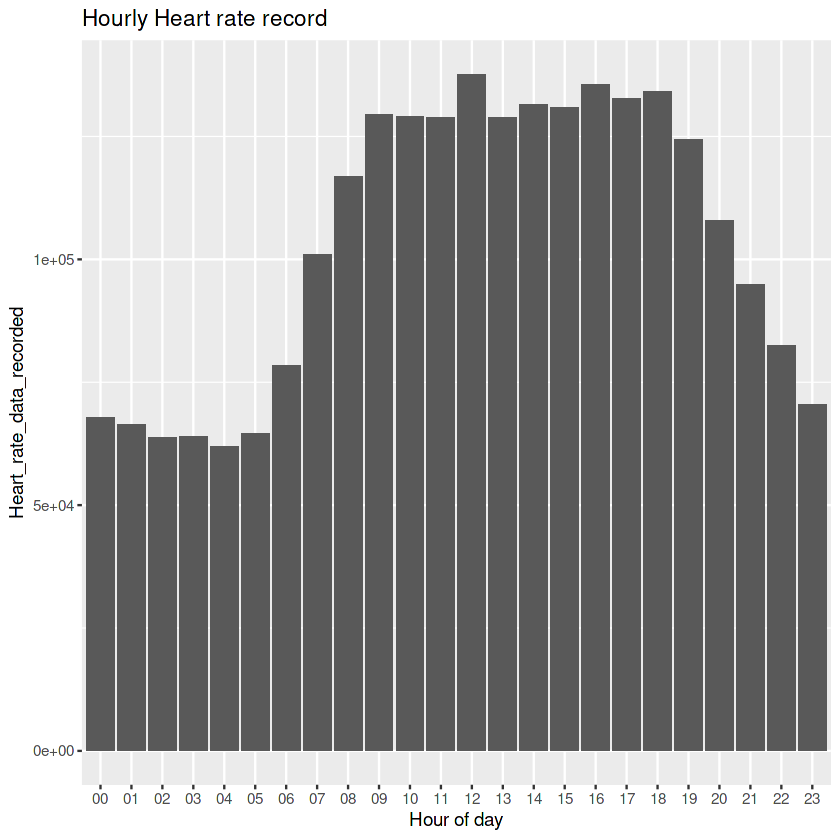

In [111]:
ggplot(heart_rate_sec,
       aes(x = hour)) +
  geom_bar(position = position_dodge(preserve = "single")) +
  labs(x = "Hour of day",y = "Heart_rate_data_recorded", title  = "Hourly Heart rate record")

* We could see heart rate data recorded gets decreased between 9 pm to 6 am. It might be due to the device

In [112]:
#Count of id between 9 pm - 6am and 6am to 9 pm
heart_rate_day <- heart_rate_sec %>%
  filter(hour >= "08" & hour < "20")
head(heart_rate_day)

Id,Time,Value,hour
<dbl>,<dttm>,<dbl>,<chr>
2022484408,2016-04-12 08:00:00,106,08
2022484408,2016-04-12 08:00:05,103,08
2022484408,2016-04-12 08:00:15,106,08
2022484408,2016-04-12 08:00:20,110,08
2022484408,2016-04-12 08:00:25,112,08
2022484408,2016-04-12 08:00:30,111,08


In [113]:
heart_rate_night <- heart_rate_sec %>%
  filter(hour < "08"  | hour >= "20" )

head(heart_rate_night)

Id,Time,Value,hour
<dbl>,<dttm>,<dbl>,<chr>
2022484408,2016-04-12 07:21:00,97,07
2022484408,2016-04-12 07:21:05,102,07
2022484408,2016-04-12 07:21:10,105,07
2022484408,2016-04-12 07:21:20,103,07
2022484408,2016-04-12 07:21:25,101,07
2022484408,2016-04-12 07:22:05,95,07


In [114]:
heart_rate_day_id <- count(heart_rate_day$Id)
heart_rate_day_id <- rename(heart_rate_day_id, replace = c("freq" = "day_count", "x" = "Id"))
heart_rate_day_id

Id,day_count
<dbl>,<int>
2022484408,142596
2026352035,2238
2347167796,88288
4020332650,150648
4388161847,143620
4558609924,142944
5553957443,141327
5577150313,135818
6117666160,85262


In [115]:
heart_rate_night_id <- count(heart_rate_night$Id)
heart_rate_night_id <- rename(heart_rate_night_id, replace = c("freq" = "night_count", "x" = "Id"))
heart_rate_night_id

Id,night_count
<dbl>,<int>
2022484408,11508
2026352035,252
2347167796,64395
4020332650,134813
4388161847,106128
4558609924,49224
5553957443,113847
5577150313,112742
6117666160,73637


In [116]:
heart_rate_count_id <- merge(heart_rate_day_id, heart_rate_night_id, by = c("Id"))
heart_rate_count_id

Id,day_count,night_count
<dbl>,<int>,<int>
2022484408,142596,11508
2026352035,2238,252
2347167796,88288,64395
4020332650,150648,134813
4388161847,143620,106128
4558609924,142944,49224
5553957443,141327,113847
5577150313,135818,112742
6117666160,85262,73637


# **6. Observations**

* A clear statement of the business task
* A description of all data sources used
* Documentation of any cleaning or manipulation of data
* A summary of the analysis
* Supporting visualizations and key findings

* Only 2 records of fat data.
* More walking steps on Tuesday's and Fridays.
* High-intensity activity has the higher correlation to calories burned
* Light-activity is the most common
* Positive relationship between daily activity and calories burned
* Sleep minutes seems to be be spread well with majority around 400 to 500 mins.
* Steps are walked most between 12:00 to 14:00 and 17:00 - 19 :00.
* Only 24 users who have recorded both sleep and activity data. Among them :
    * 12 users recorded data more than 20 days
    * 3 users recorded data between 11 to 20 days.
    * 9 users recorded data less than 10 days.
* Out of 31 days data :
    * Minimum 8 users shared data on a given day.
    * Max 14 users shared data together together on 10 days out of 31 days
* Overall 8 users have submitted weight log data. And among that 2 users submitted 80% of the total weight_log data.
* Heart rate data submission decreases post 22:00 hr to 8:00 in morning. It might be due to Users not preferable to keep the device along while sleeping.

* It is most common for participants to use fitness trackers to record daily activity. However, participants do not always record their daily sleep and weight. This could be due to lack of comfort to sleep with their fitness trackers at night and therefore taking them off before getting in bed.
* Participants are not logging their weight. 

# **7. Recommendations**
* We believe that by positioning itself to understand its users better and pushing personalized reminders, these recommendations can be used as a marketing strategy to attract more users to grow its overall user base.
* A new fitness device to log night sleep should be made that users find comforatable to keep along with them during sleep. This would let to captures sleep pattern nicely.
* Survey should be made out to understand why users dont record their weights and new product integrated with the data logging should be made which makes it easier for customers to track overall BMI.

# **8. Project Limitations**
* The sample size for the analysis is 33
* Data is not current (back in 2016) and may not reflect current consumer behaviour due to changes in lifestyle, demographics, economic and social norms.
* Period of tracking is limited to a month. Trend analysis may not be accurate and useful.